# **Telecom Churn Prediction - Submission for SA4108 CA**
<b> Part 1: Classification </b>

---



# **1) Problem Statement**


---


The purpose of this report is to predict the churn rate of a telecommunications company. The churn rate refers to the rate of cancellation of membership to a telecommunications provider by customers in this instance and is an important metric for a company's growth. A company's churn rate has an inverse relationship with a company's profit margin as a lower churn rate would mean a higher profit margin for a company. A low churn rate also sheds light on what are the motivating factors for a customer to remain loyal to a service provider or otherwise.

# **2) Simple Data Dictionary for Training Data**


---
* gender: gender (Female, Male)
* SeniorCitizen: Whether the customer is a senior citizen or not (0, 1)
* Partner: Whether the customer has a partner or not (No, Yes)
*	Dependents: Whether the customer has dependents or not (No, Yes)
*	tenure: Number of months the customer has stayed with the company
*	PhoneService: Whether the customer has a phone service or not (No, Yes)
*	MultipleLines: Whether the customer has multiple lines or not (No, No phone service, Yes)
*	InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
*	OnlineSecurity: Whether the customer has online security or not (No, No internet service, Yes)
*	OnlineBackup: Whether the customer has online backup or not (No, No internet service, Yes)
*	DeviceProtection: Whether the customer has device protection or not (No, No internet service, Yes)
*	TechSupport: Whether the customer has tech support or not (No, No internet service, Yes)
*	StreamingTV: Whether the customer has streaming TV or not (No, No internet service, Yes)
*	StreamingMovies: Whether the customer has streaming movies or not (No, No internet service, Yes)
*	Contract: The contract term of the customer (Month-to-month, One year, Two year)
*	PaperlessBilling: Whether the customer has paperless billing or not (No, Yes)
*	PaymentMethod: The customer’s payment method (Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check)
*	MonthlyCharges: The amount charged to the customer monthly
*	TotalCharges: The total amount charged to the customer
*	Churn: Whether the customer churned(left) or not(stayed) (No, Yes)

# **3) Load Data**


---



In [2]:
import pandas as pd # data analysis package
import numpy as np # general package used for processing arrays
import matplotlib.pyplot as plt # 2d plotting library
import seaborn as sns # visualization library based on matplotlib
import matplotlib.ticker as mtick

In [3]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import io

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['telecom_users.csv']))

In [5]:
df.tail() # to show that data is properly loaded

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
5985,860,4795-UXVCJ,Male,0,No,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.3,No


## **Visualise Data**

---



Text(-0.45, 78, 'Customers who are newer are more likely to churn.')

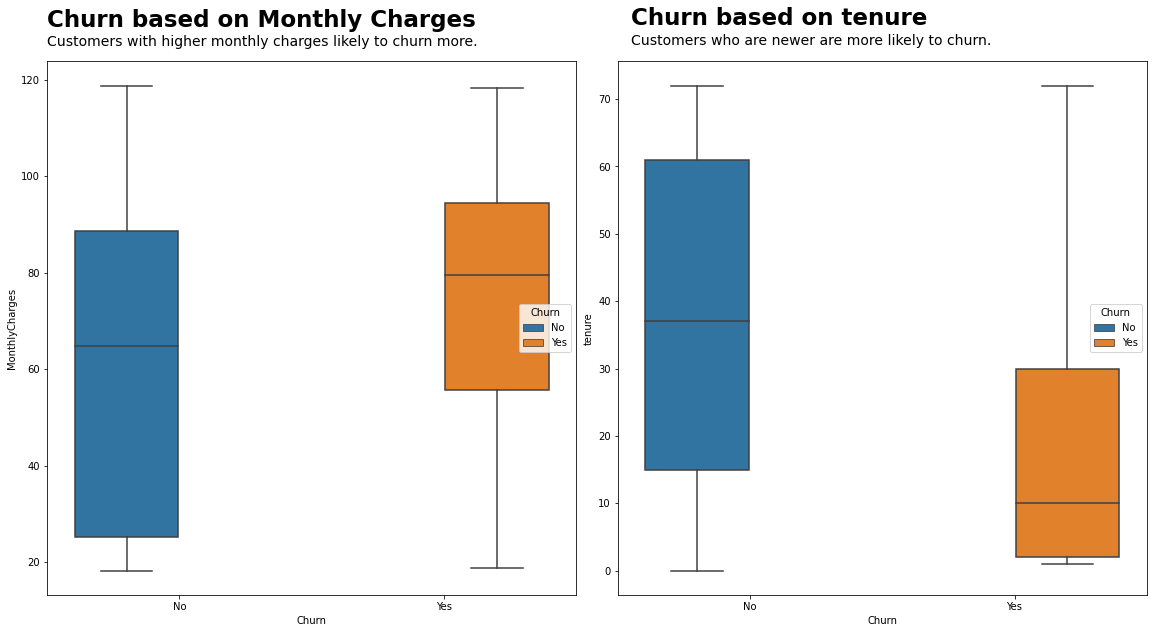

In [6]:
fig,ax = plt.subplots(1,2, figsize=(16,8)) #formatting for the presentation style
fig.tight_layout()

sns.boxplot(ax=ax[0], y='MonthlyCharges',x='Churn', data=df, hue='Churn')
sns.boxplot(ax=ax[1],y='tenure',x='Churn',data=df,hue='Churn');

ax[0].text(-0.5, 131,"Churn based on Monthly Charges",fontsize=23,fontweight='bold')
ax[0].text(-0.5,127,"Customers with higher monthly charges likely to churn more.",fontsize=14,fontweight='light')

ax[1].text(-0.45, 81,"Churn based on tenure",fontsize=23,fontweight='bold')
ax[1].text(-0.45,78,"Customers who are newer are more likely to churn.",fontsize=14,fontweight='light')

plt.tight_layout()

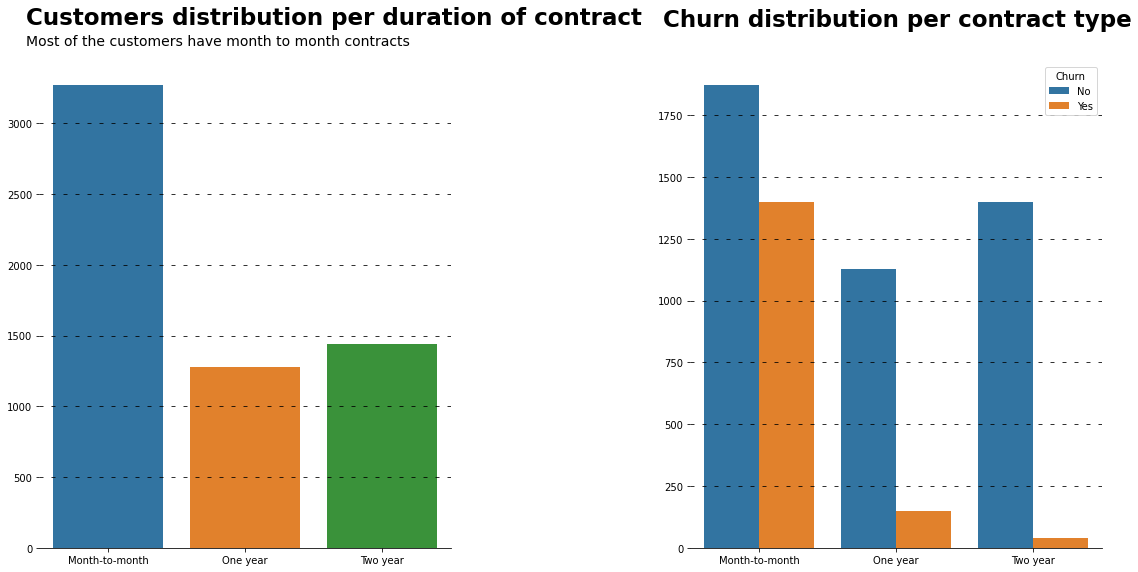

In [7]:
fig=plt.figure(figsize=(16,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[None for _ in range(2)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-0.6,3700,"Customers distribution per duration of contract",fontsize=23,fontweight='bold')
ax[0].text(-0.6,3550,"Most of the customers have month to month contracts",fontsize=14,fontweight='light')

ax[1].text(-0.7,2110,"Churn distribution per contract type",fontsize=23,fontweight='bold')


sns.countplot(data=df,x='Contract',ax=ax[0],order=['Month-to-month','One year','Two year'])
sns.countplot(data=df,x='Contract',ax=ax[1],hue='Churn',order=['Month-to-month','One year','Two year'])

for i in range(2):
    ax[i].grid(color='black', linestyle=':', axis='y', zorder=0, dashes=(5,10))
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()


**Observations**

---


1.   Churn rate increases when customers have higher monthly charges.
2.   Customers who just started to use the services of the telecommunications company are more likely to leave. 
3. Customers who make automatic payments are less likely to churn. 
4. Customers who are on a one-year or two-year contracts are less likely to churn.



Text(-0.49, 1970, 'Churn distribution based on online security')

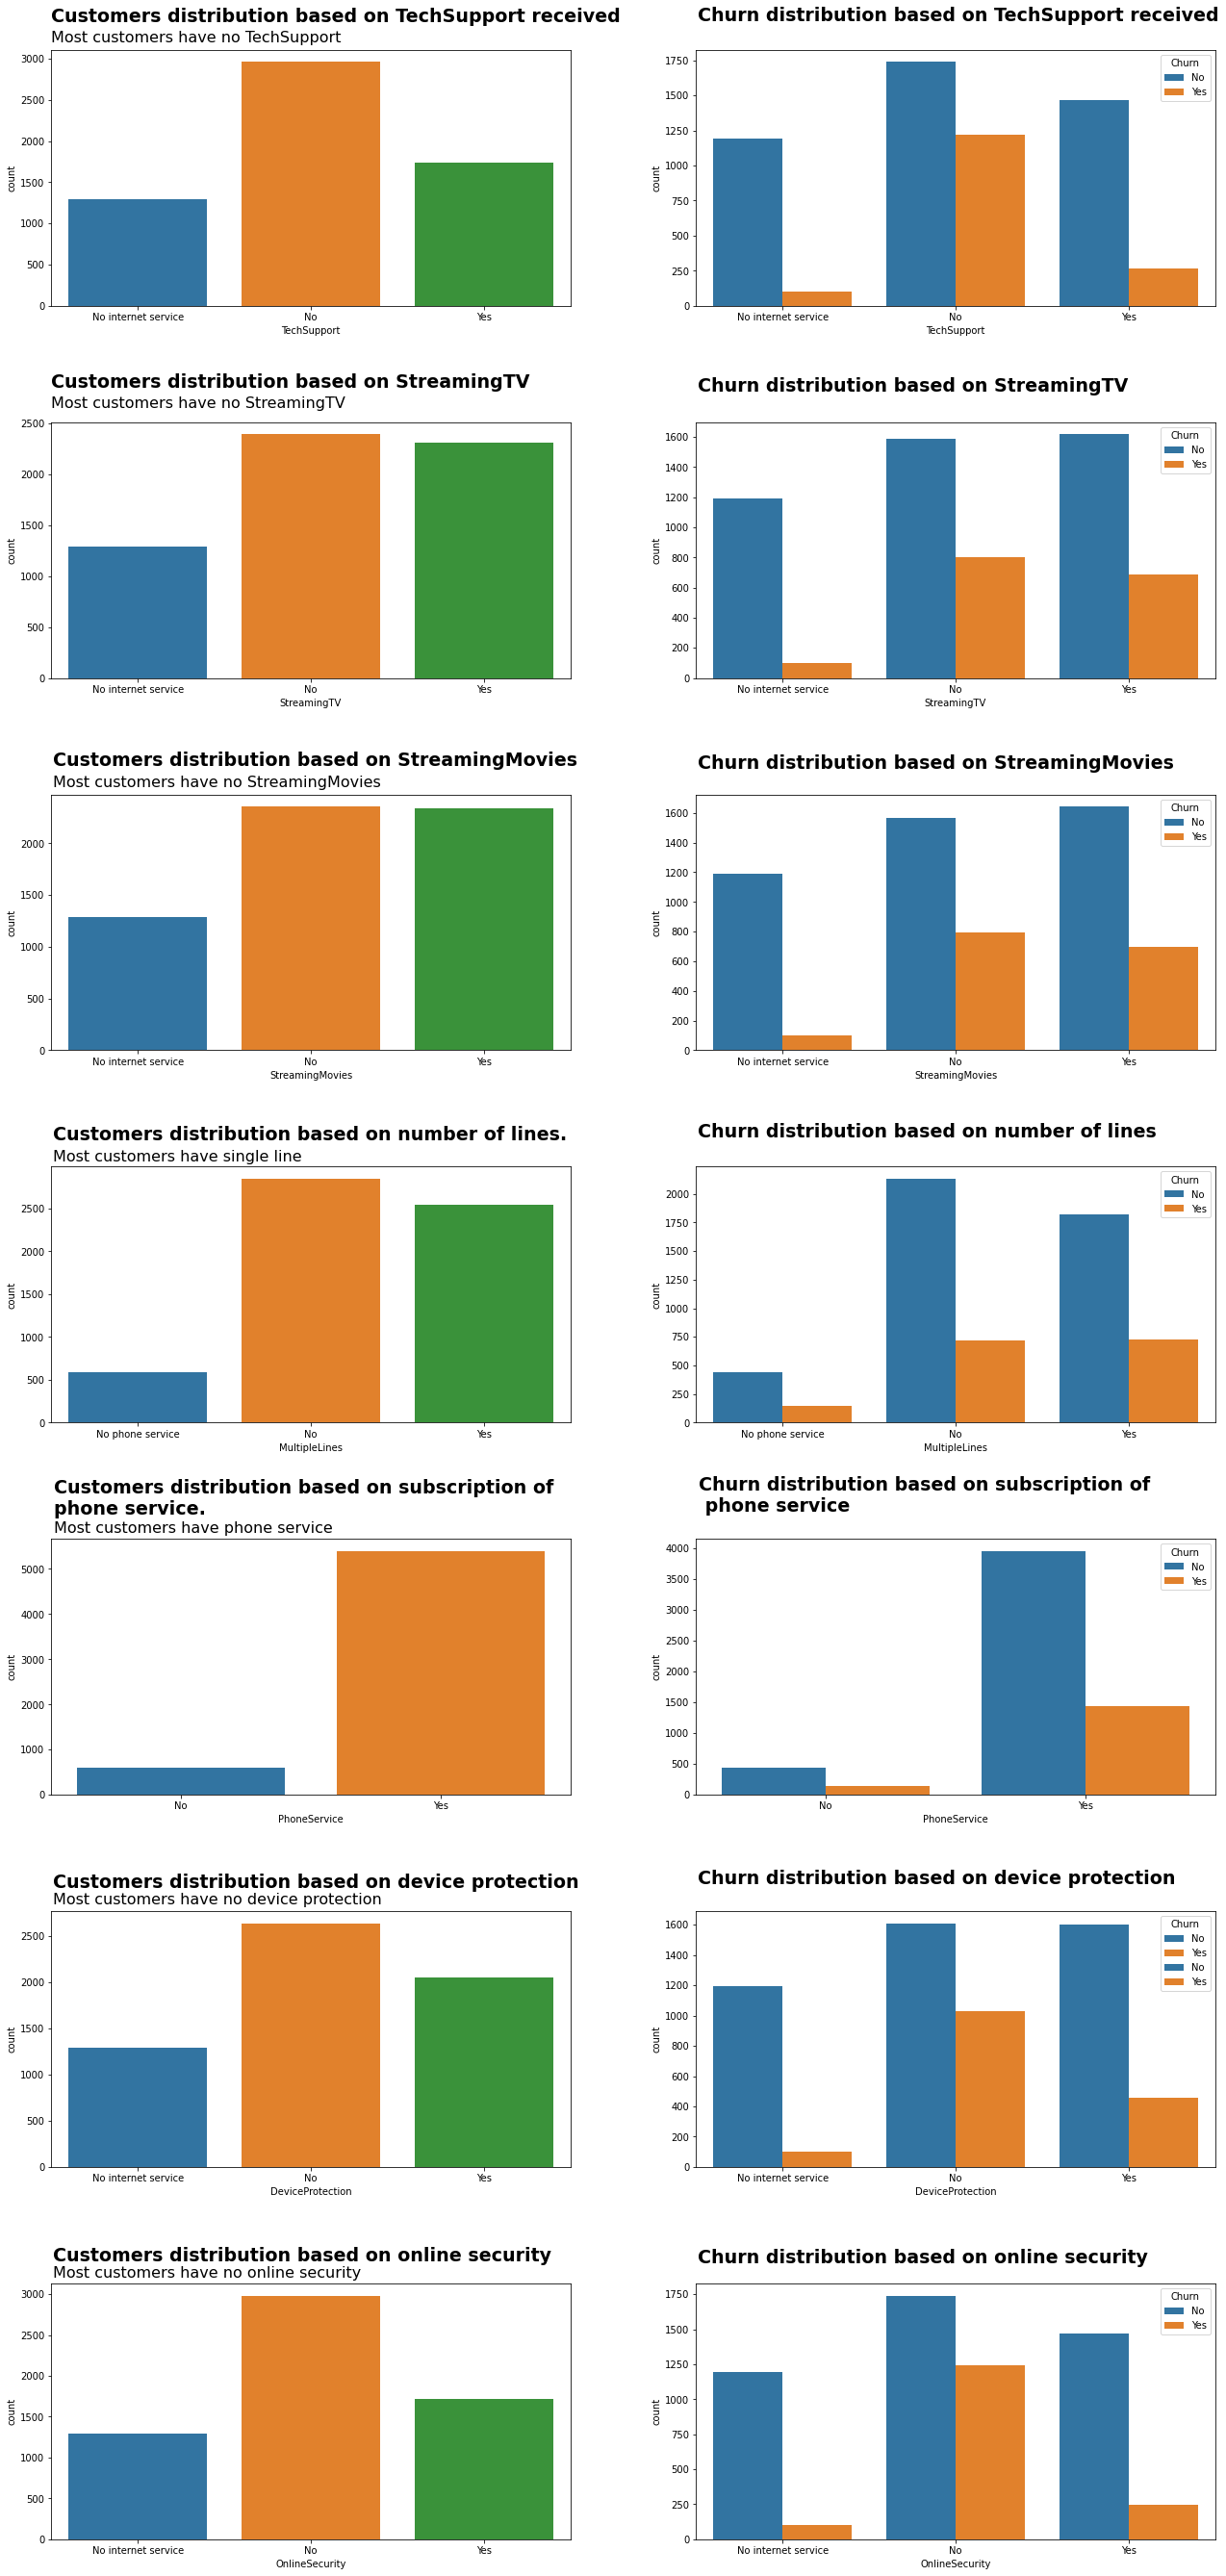

In [8]:
fig,ax = plt.subplots(7,2, figsize=(20,39)) #formatting for the presentation style
fig.tight_layout(pad=10)

sns.countplot(data=df,x='TechSupport',ax=ax[0,0],order=['No internet service','No','Yes'])
sns.countplot(data=df,x='TechSupport',ax=ax[0,1],hue='Churn',order=['No internet service','No','Yes'])

sns.countplot(data=df,x='StreamingTV',ax=ax[1,0],order=['No internet service','No','Yes'])
sns.countplot(data=df,x='StreamingTV',ax=ax[1,1],hue='Churn',order=['No internet service','No','Yes'])

sns.countplot(data=df,x='StreamingMovies',ax=ax[2,0],order=['No internet service','No','Yes'])
sns.countplot(data=df,x='StreamingMovies',ax=ax[2,1],hue='Churn',order=['No internet service','No','Yes'])

sns.countplot(data=df,x='MultipleLines',ax=ax[3,0],order=['No phone service','No','Yes'])
sns.countplot(data=df,x='MultipleLines',ax=ax[3,1],hue='Churn',order=['No phone service','No','Yes'])

sns.countplot(data=df,x='PhoneService',ax=ax[4,0],order=['No','Yes'])
sns.countplot(data=df,x='PhoneService',ax=ax[4,1],hue='Churn',order=['No','Yes'])

sns.countplot(data=df,x='DeviceProtection',ax=ax[5,0],order=['No internet service','No','Yes'])
sns.countplot(data=df,x='DeviceProtection',ax=ax[5,1],hue='Churn',order=['No internet service','No','Yes'])

sns.countplot(data=df,x='DeviceProtection',ax=ax[5,0],order=['No internet service','No','Yes'])
sns.countplot(data=df,x='DeviceProtection',ax=ax[5,1],hue='Churn',order=['No internet service','No','Yes'])

sns.countplot(data=df,x='OnlineSecurity',ax=ax[6,0],order=['No internet service','No','Yes'])
sns.countplot(data=df,x='OnlineSecurity',ax=ax[6,1],hue='Churn',order=['No internet service','No','Yes'])


ax[0,0].text(-0.5,3450,"Customers distribution based on TechSupport received",fontsize=19,fontweight='bold')
ax[0,0].text(-0.5,3200,"Most customers have no TechSupport",fontsize=16,fontweight='light')

ax[0,1].text(-0.49,2030,"Churn distribution based on TechSupport received",fontsize=19,fontweight='bold')

ax[1,0].text(-0.5,2850,"Customers distribution based on StreamingTV",fontsize=19,fontweight='bold')
ax[1,0].text(-0.5,2650,"Most customers have no StreamingTV",fontsize=16,fontweight='light')

ax[1,1].text(-0.49,1900,"Churn distribution based on StreamingTV",fontsize=19,fontweight='bold')

ax[2,0].text(-0.49,2750,"Customers distribution based on StreamingMovies",fontsize=19,fontweight='bold')
ax[2,0].text(-0.49,2550,"Most customers have no StreamingMovies",fontsize=16,fontweight='light')

ax[2,1].text(-0.49,1900,"Churn distribution based on StreamingMovies",fontsize=19,fontweight='bold')

ax[3,0].text(-0.49,3300,"Customers distribution based on number of lines.",fontsize=19,fontweight='bold')
ax[3,0].text(-0.49,3050,"Most customers have single line",fontsize=16,fontweight='light')

ax[3,1].text(-0.49,2500,"Churn distribution based on number of lines",fontsize=19,fontweight='bold')

ax[4,0].text(-0.49,6200, r"Customers distribution based on subscription of" +"\n"  +"phone service.",fontsize=19,fontweight='bold')
ax[4,0].text(-0.49,5800,"Most customers have phone service",fontsize=16,fontweight='light')

ax[4,1].text(-0.49,4600,r"Churn distribution based on subscription of" +"\n"  +" phone service",fontsize=19,fontweight='bold')

ax[5,0].text(-0.49,3030,"Customers distribution based on device protection",fontsize=19,fontweight='bold')
ax[5,0].text(-0.49,2850,"Most customers have no device protection",fontsize=16,fontweight='light')

ax[5,1].text(-0.49,1870,"Churn distribution based on device protection",fontsize=19,fontweight='bold')

ax[6,0].text(-0.49,3400,"Customers distribution based on online security",fontsize=19,fontweight='bold')
ax[6,0].text(-0.49,3200,"Most customers have no online security",fontsize=16,fontweight='light')

ax[6,1].text(-0.49,1970,"Churn distribution based on online security",fontsize=19,fontweight='bold')


**Observations**

---


1.   Higher churn rate is observed when customers have fiber optic as their choice of Internet Service.
2. Higher churn rate is observed when users have no online security, online backup and device protection.

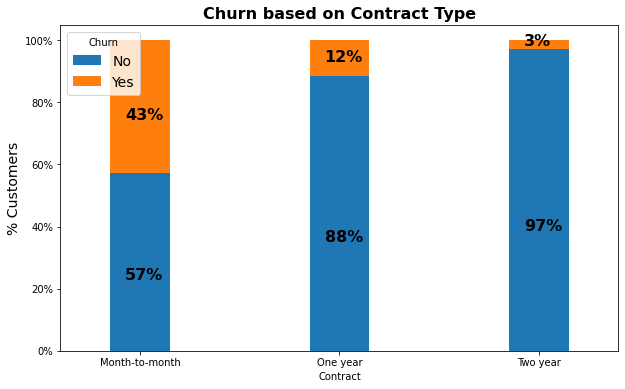

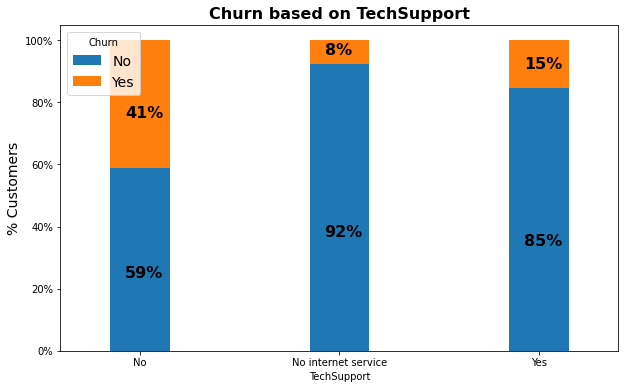

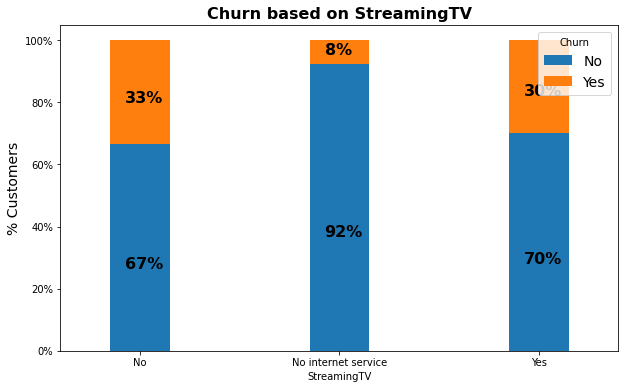

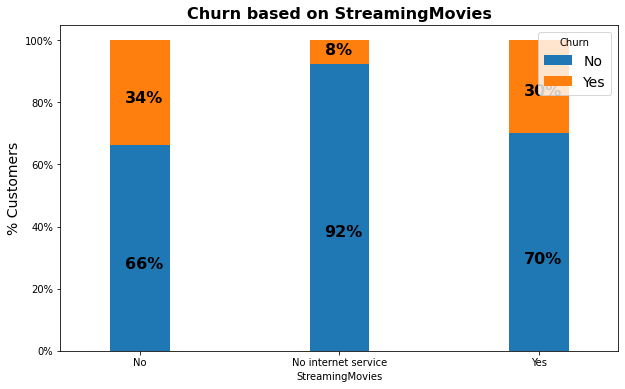

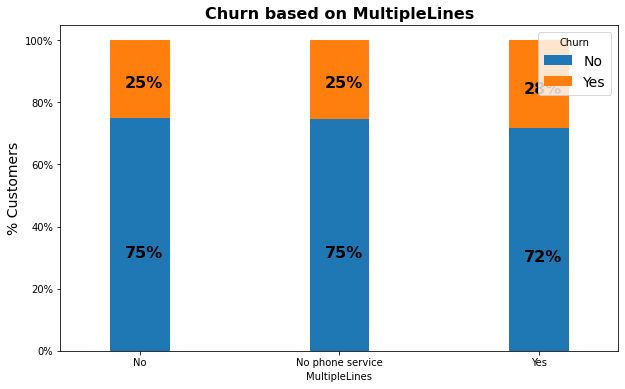

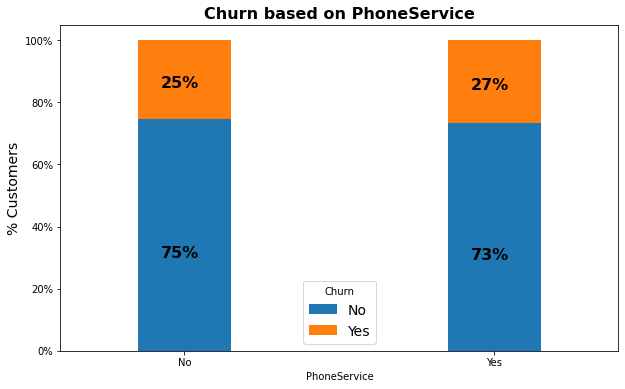

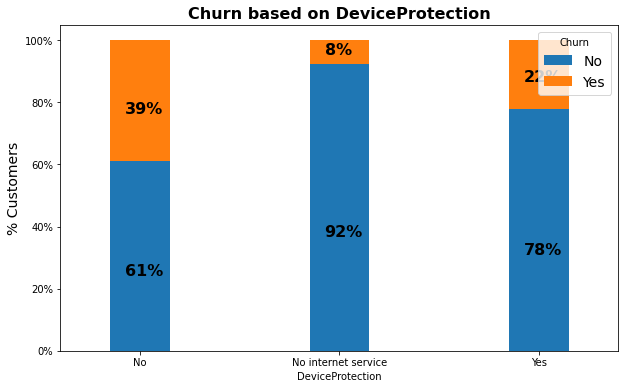

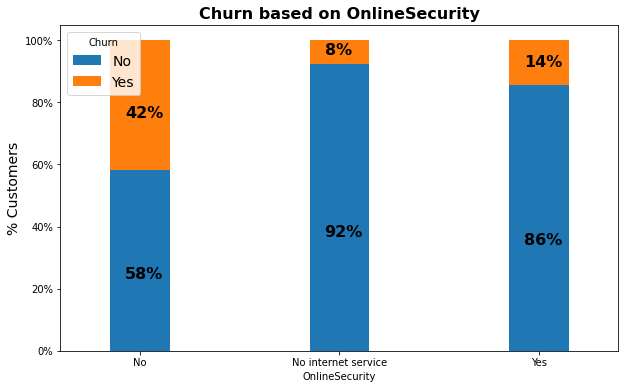

In [9]:
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0, figsize = (10,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn based on Contract Type',size = 16, weight= 'bold')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'black', weight = 'bold', size = 16)

TechSupport_churn = df.groupby(['TechSupport','Churn']).size().unstack()

ax = (TechSupport_churn.T*100.0 / TechSupport_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0, figsize = (10,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn based on TechSupport',size = 16, weight = 'bold')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'black', weight = 'bold', size = 16)

StreamingTV_churn = df.groupby(['StreamingTV','Churn']).size().unstack()

ax = (StreamingTV_churn.T*100.0 / StreamingTV_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0, figsize = (10,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn based on StreamingTV',size = 16, weight ='bold')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'black', weight = 'bold', size = 16)
    
StreamingMovies_churn = df.groupby(['StreamingMovies','Churn']).size().unstack()

ax = (StreamingMovies_churn.T*100.0 / StreamingMovies_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0, figsize = (10,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn based on StreamingMovies',size = 16, weight ='bold')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'black', weight = 'bold', size = 16)
    
MultipleLines_churn = df.groupby(['MultipleLines','Churn']).size().unstack()

ax = (MultipleLines_churn.T*100.0 / MultipleLines_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0, figsize = (10,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn based on MultipleLines',size = 16, weight ='bold')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'black', weight = 'bold', size = 16)
    
PhoneService_churn = df.groupby(['PhoneService','Churn']).size().unstack()

ax = (PhoneService_churn.T*100.0 / PhoneService_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0, figsize = (10,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn based on PhoneService',size = 16, weight ='bold')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'black', weight = 'bold', size = 16)
    
DeviceProtection_churn = df.groupby(['DeviceProtection','Churn']).size().unstack()

ax = (DeviceProtection_churn.T*100.0 / DeviceProtection_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0, figsize = (10,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn based on DeviceProtection',size = 16, weight ='bold')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'black', weight = 'bold', size = 16)
    
OnlineSecurity_churn = df.groupby(['OnlineSecurity','Churn']).size().unstack()

ax = (OnlineSecurity_churn.T*100.0 / OnlineSecurity_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0, figsize = (10,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn based on OnlineSecurity',size = 16, weight ='bold')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'black', weight = 'bold', size = 16)



1.   Customers with monthly contracts are more likely to churn.
2.   Customers with no TechSupport are more likely to churn.
3.   Customers with no StreamingTV services are more likely to churn.
4.   Customers with no StreamingMovies services are more likely to churn.
5.   Customers with multiple lines have a slightly higher churn rate 3%.
6.   Customers with phone service have a slightly higher churn rate of 2%.
7.   Customers with no device protection are more likely to churn. 
8.   Customers with no online security are more likely to churn. 








# **4) Data Cleaning**

---



In [10]:
df.shape

(5986, 22)

In [11]:
df = df.drop(['Unnamed: 0', 'customerID'],axis=1) # delete unnecessary columns
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
missing_values = 0
for i in range(len(df.index)):
    if df['TotalCharges'][i].replace('.', '').isdigit() == False:
        df.iloc[i, 18] = None
        missing_values += 1
print(missing_values)
df['TotalCharges'] = df['TotalCharges'].astype('float')

10


In [14]:
df.isnull().sum() # check for null values

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

There are 10 null values under TotalCharges. Hence, we will investigate.

In [15]:
df[df.TotalCharges.isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


For all 10 samples, tenure is also 0 which indicates that the user has not subscribed with the company at all, hence TotalCharges will also be assigned as 0.

In [16]:
df.TotalCharges = df.TotalCharges.fillna(0)
print(df.info()) # to show there are no more null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


**Applying label encoding to categorical columns**

In [17]:
#taking care of categorical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat = list(df.dtypes[df.dtypes == object].index)
for i in cat:
    df[i]=le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,1
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,0
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,0


In [18]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [19]:
# print out each variable and its unique values
for i in df:
    print(i,":",len(df[i].unique()),"unique values")

gender : 2 unique values
SeniorCitizen : 2 unique values
Partner : 2 unique values
Dependents : 2 unique values
tenure : 73 unique values
PhoneService : 2 unique values
MultipleLines : 3 unique values
InternetService : 3 unique values
OnlineSecurity : 3 unique values
OnlineBackup : 3 unique values
DeviceProtection : 3 unique values
TechSupport : 3 unique values
StreamingTV : 3 unique values
StreamingMovies : 3 unique values
Contract : 3 unique values
PaperlessBilling : 2 unique values
PaymentMethod : 4 unique values
MonthlyCharges : 1526 unique values
TotalCharges : 5611 unique values
Churn : 2 unique values


# **5) Machine Learning Models Before One-Hot Encoding and Feature Extraction**
* Logistic Regression Model
* K-NN Classification
* Decision Trees

---



In [20]:
#Use for timing the training time and prediction time
from datetime import datetime

#time_1 = datetime.now()
#time_2 = datetime.now()
#time_delta = (time_2 - time_1)
#total_seconds = time_delta.total_seconds()
#print(f'{total_seconds} seconds taken')

In [21]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

**Logistic Regression Model**

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

time_1 = datetime.now()

lr.fit(x_train,y_train)

time_2 = datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken for training')

0.153507 seconds taken for training


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

time_1 = datetime.now()

y_pred = lr.predict(x_test)

time_2 = datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken for prediction')

cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

lra = accuracy_score(y_test,y_pred)
print('accuracy score = ',lra)

0.005309 seconds taken for prediction
confusion matrix:
 [[796  87]
 [129 186]]
accuracy score =  0.8196994991652755


**K-NN Classification**

In [24]:
from sklearn.neighbors import KNeighborsClassifier

k_array = np.arange(1,21,2)
for k in k_array:
    knn_ex = KNeighborsClassifier(n_neighbors=k)
    knn_ex.fit(x_train, y_train)
    y_pred=knn_ex.predict(x_test)
    print(k)
    print(accuracy_score(y_test, y_pred))

1
0.7045075125208681
3
0.7387312186978298
5
0.7479131886477463
7
0.7579298831385642
9
0.7704507512520868
11
0.7746243739565943
13
0.7829716193656093
15
0.7821368948247078
17
0.7838063439065108
19
0.7829716193656093


In [25]:
# choose k=19

time_1=datetime.now()

knn=KNeighborsClassifier(n_neighbors = 19)
knn.fit(x_train,y_train)

time_2=datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken for training')


time_1=datetime.now()

y_pred = knn.predict(x_test)

time_2=datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken for prediction')

print(confusion_matrix(y_test,y_pred))
knna = accuracy_score(y_test,y_pred)
print(knna)

0.010569 seconds taken for training
0.04277 seconds taken for prediction
[[821  62]
 [198 117]]
0.7829716193656093


**Decision Tree**

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth =3, random_state=0)

time_1 = datetime.now()

dt.fit(x_train,y_train) 

time_2 = datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken for training')

time_1 = datetime.now()

y_pred = dt.predict(x_test)

time_2 = datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken for prediction')
dta = accuracy_score(y_test,y_pred)
dta

0.008125 seconds taken for training
0.000739 seconds taken for prediction


0.7813021702838063

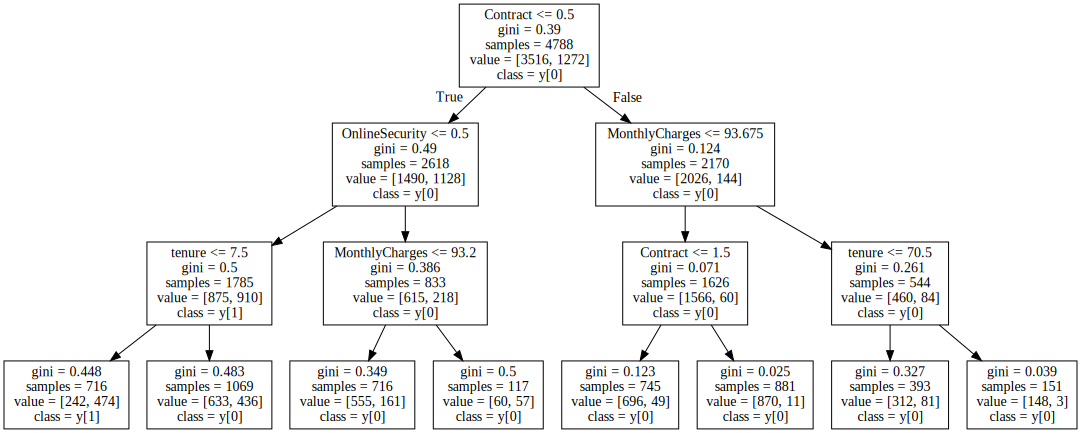

In [27]:
from sklearn import tree
import graphviz 
from graphviz import Source

Source(tree.export_graphviz(dt,out_file=None, class_names=True, feature_names= x_train.columns))

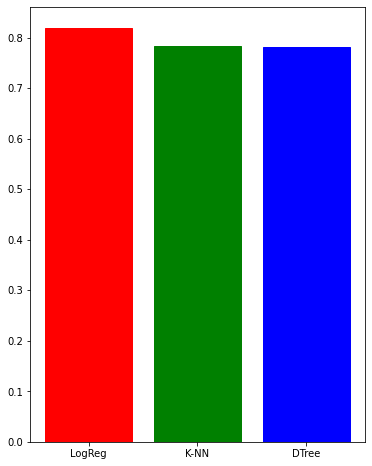

In [28]:
plt.figure(figsize = (6,8))
ac = [lra,knna,dta]
name = ['LogReg','K-NN','DTree']
barlist = plt.bar(name,ac)
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')

Logistic Regression has the highest accuracy score before one-hot encoding and feature extraction.

# **6) One-Hot Encoding**

---



In [29]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
        'StreamingMovies', 'Contract', 'PaymentMethod']
#loop through columns that need one hot encoding
for col in cols:
    #reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
    x = onehotencoder.fit_transform(df[col].values.reshape(-1,1)).toarray()
    #To add this back into the original dataframe
    dfOneHot = pd.DataFrame(x, columns = [col + str(i) for i in range(x.shape[1])])
    df = pd.concat([df, dfOneHot], axis=1)
    #dropping the current col column 
    df= df.drop([col], axis=1) 

In [30]:
# printing to verify 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines0,MultipleLines1,MultipleLines2,InternetService0,InternetService1,InternetService2,OnlineSecurity0,OnlineSecurity1,OnlineSecurity2,OnlineBackup0,OnlineBackup1,OnlineBackup2,DeviceProtection0,DeviceProtection1,DeviceProtection2,TechSupport0,TechSupport1,TechSupport2,StreamingTV0,StreamingTV1,StreamingTV2,StreamingMovies0,StreamingMovies1,StreamingMovies2,Contract0,Contract1,Contract2,PaymentMethod0,PaymentMethod1,PaymentMethod2,PaymentMethod3
0,1,0,1,1,72,1,0,24.10,1734.65,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,0,0,0,44,1,1,88.15,3973.20,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,1,1,0,38,1,1,74.95,2869.85,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0,0,0,4,1,1,55.90,238.50,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,2,1,0,53.45,119.50,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# shift 'Churn' column to the last column because it is the target dependent variable
churn_col = df['Churn']
df.drop('Churn', inplace=True, axis=1)
df['Churn'] = churn_col
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines0,MultipleLines1,MultipleLines2,InternetService0,InternetService1,InternetService2,OnlineSecurity0,OnlineSecurity1,OnlineSecurity2,OnlineBackup0,OnlineBackup1,OnlineBackup2,DeviceProtection0,DeviceProtection1,DeviceProtection2,TechSupport0,TechSupport1,TechSupport2,StreamingTV0,StreamingTV1,StreamingTV2,StreamingMovies0,StreamingMovies1,StreamingMovies2,Contract0,Contract1,Contract2,PaymentMethod0,PaymentMethod1,PaymentMethod2,PaymentMethod3,Churn
0,1,0,1,1,72,1,0,24.10,1734.65,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,0,0,0,0,44,1,1,88.15,3973.20,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0,1,1,0,38,1,1,74.95,2869.85,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,1,0,0,0,4,1,1,55.90,238.50,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,1,0,0,0,2,1,0,53.45,119.50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


# **7) Machine Learning Models After One-Hot Encoding and Before Feature Extraction**
* Logistic Regression Model
* K-NN Classification
* Decision Trees

---



In [32]:
#from sklearn.model_selection import train_test_split

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

**Logistic Regression Model**

In [33]:
#from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

time_1 = datetime.now()

lr.fit(x_train,y_train)

time_2 = datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken for training')

0.20483 seconds taken for training


In [34]:
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score

time_1 = datetime.now()

y_pred = lr.predict(x_test)

time_2 = datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken for prediction')

cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

lra = accuracy_score(y_test,y_pred)
print('accuracy score = ',lra)

0.001428 seconds taken for prediction
confusion matrix:
 [[800  83]
 [135 180]]
accuracy score =  0.8180300500834724


**K-NN Classification**

In [35]:
#from sklearn.neighbors import KNeighborsClassifier

k_array = np.arange(1,21,2)
for k in k_array:
    knn_ex = KNeighborsClassifier(n_neighbors=k)
    knn_ex.fit(x_train, y_train)
    y_pred=knn_ex.predict(x_test)
    print(k)
    print(accuracy_score(y_test, y_pred))

1
0.7045075125208681
3
0.7404006677796328
5
0.7429048414023373
7
0.7621035058430717
9
0.7721202003338898
11
0.7754590984974958
13
0.7838063439065108
15
0.7813021702838063
17
0.7838063439065108
19
0.7854757929883138


In [36]:
knn_ex = KNeighborsClassifier(n_neighbors=19)

time_1 = datetime.now()

knn_ex.fit(x_train, y_train)

time_2 = datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken for training')

time_1 = datetime.now()
    
y_pred=knn_ex.predict(x_test)

time_2 = datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken for prediction')

knna = accuracy_score(y_test, y_pred)
print(knna)

0.018797 seconds taken for training
0.054838 seconds taken for prediction
0.7854757929883138


**Decision Tree**

In [37]:
#from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth =3, random_state=0)

time_1 = datetime.now()

dt.fit(x_train,y_train)

time_2 = datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken for training')

time_1 = datetime.now()

y_pred = dt.predict(x_test)

time_2 = datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken for prediction')

dta = accuracy_score(y_test,y_pred)
dta

0.01053 seconds taken for training
0.001068 seconds taken for prediction


0.7979966611018364

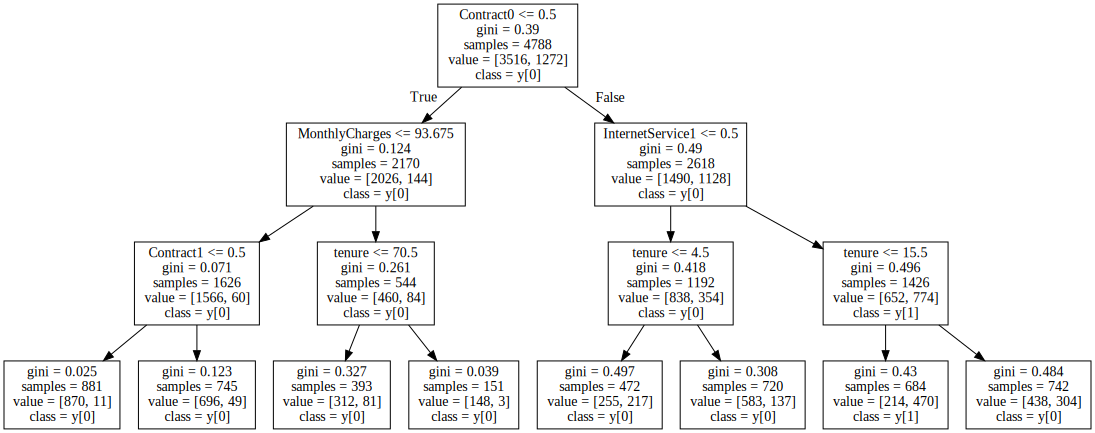

In [38]:
#from sklearn import tree
#import graphviz 
#from graphviz import Source

Source(tree.export_graphviz(dt,out_file=None, class_names=True, feature_names= x_train.columns))

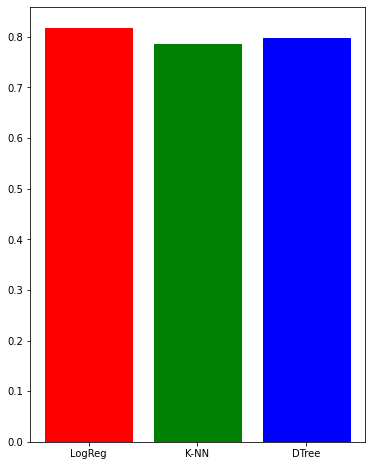

In [39]:
plt.figure(figsize = (6,8))
ac = [lra,knna,dta]
name = ['LogReg','K-NN','DTree']
barlist = plt.bar(name,ac)
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')

After one-hot encoding and before feature extraction, all 3 models performed around the same accuracy score with Logistic Regression having a slightly higher accuracy score. 

# **8) Feature Selection**

---

In [40]:
corr_mat = df.corr()
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines0,MultipleLines1,MultipleLines2,InternetService0,InternetService1,InternetService2,OnlineSecurity0,OnlineSecurity1,OnlineSecurity2,OnlineBackup0,OnlineBackup1,OnlineBackup2,DeviceProtection0,DeviceProtection1,DeviceProtection2,TechSupport0,TechSupport1,TechSupport2,StreamingTV0,StreamingTV1,StreamingTV2,StreamingMovies0,StreamingMovies1,StreamingMovies2,Contract0,Contract1,Contract2,PaymentMethod0,PaymentMethod1,PaymentMethod2,PaymentMethod3,Churn
gender,1.000000,-0.007447,-0.007791,0.009083,0.003207,-0.004913,-0.013990,-0.014286,-0.003664,-0.002087,0.004913,-0.000853,0.007244,-0.011121,0.005043,0.015776,0.005043,-0.022042,0.013949,0.005043,-0.018858,0.000580,0.005043,-0.004975,0.005223,0.005043,-0.010327,0.005289,0.005043,-0.009585,0.004491,0.005043,-0.008748,-0.005120,0.016197,-0.009553,-0.017350,0.001695,0.007008,0.007530,-0.009548
SeniorCitizen,-0.007447,1.000000,0.014867,-0.214233,0.005468,0.009464,0.155691,0.219387,0.093807,-0.126027,-0.009464,0.132999,-0.107650,0.256282,-0.184760,0.185981,-0.184760,-0.037615,0.092157,-0.184760,0.063561,0.094173,-0.184760,0.061565,0.207382,-0.184760,-0.061045,0.053293,-0.184760,0.102519,0.038851,-0.184760,0.116841,0.141796,-0.040934,-0.125914,-0.013275,-0.028912,0.170548,-0.150208,0.150097
Partner,-0.007791,0.014867,1.000000,0.449029,0.381976,0.024926,-0.018037,0.104006,0.321349,-0.132962,-0.024926,0.149325,-0.007910,0.005765,0.002190,-0.140166,0.002190,0.153067,-0.145474,0.002190,0.149407,-0.147939,0.002190,0.152803,-0.115655,0.002190,0.125468,-0.131039,0.002190,0.130013,-0.122451,0.002190,0.120763,-0.285939,0.084043,0.252479,0.099046,0.097098,-0.087224,-0.094824,-0.146840
Dependents,0.009083,-0.214233,0.449029,1.000000,0.163710,-0.000579,-0.112405,-0.115803,0.062691,0.021830,0.000579,-0.022399,0.051601,-0.168349,0.143465,-0.194971,0.143465,0.085138,-0.140116,0.143465,0.021946,-0.127766,0.143465,0.009334,-0.179233,0.143465,0.067460,-0.101902,0.143465,-0.018705,-0.082077,0.143465,-0.038750,-0.231615,0.062556,0.209799,0.041184,0.077927,-0.157817,0.060282,-0.160204
tenure,0.003207,0.005468,0.381976,0.163710,1.000000,0.010392,0.006569,0.256983,0.827756,-0.329603,-0.010392,0.339181,0.009123,0.027390,-0.043596,-0.264231,-0.043596,0.331981,-0.308294,-0.043596,0.358248,-0.312061,-0.043596,0.364085,-0.263055,-0.043596,0.329410,-0.246582,-0.043596,0.284979,-0.260305,-0.043596,0.297389,-0.643720,0.199490,0.558536,0.228645,0.236183,-0.200316,-0.231891,-0.348469
PhoneService,-0.004913,0.009464,0.024926,-0.000579,0.010392,1.000000,0.021340,0.251029,0.117165,0.315017,-1.000000,0.284667,-0.455142,0.292425,0.173395,-0.061744,0.173395,-0.089481,-0.096362,0.173395,-0.049382,-0.074266,0.173395,-0.072536,-0.060816,0.173395,-0.090169,-0.123065,0.173395,-0.022703,-0.115619,0.173395,-0.030394,-0.002022,-0.005793,0.007904,0.010743,-0.014358,0.005602,-0.002758,0.009421
PaperlessBilling,-0.013990,0.155691,-0.018037,-0.112405,0.006569,0.021340,1.000000,0.355816,0.162804,-0.154719,-0.021340,0.169139,-0.065577,0.330319,-0.322736,0.261808,-0.322736,0.004057,0.148412,-0.322736,0.124097,0.166915,-0.322736,0.105015,0.231914,-0.322736,0.037001,0.047141,-0.322736,0.225319,0.061468,-0.322736,0.210501,0.174837,-0.052273,-0.153529,-0.017177,-0.019713,0.210580,-0.200400,0.188996
MonthlyCharges,-0.014286,0.219387,0.104006,-0.115803,0.256983,0.251029,0.355816,1.000000,0.656762,-0.339776,-0.251029,0.494525,-0.161562,0.785673,-0.761178,0.351714,-0.761178,0.303575,0.202858,-0.761178,0.445749,0.169838,-0.761178,0.481741,0.316211,-0.761178,0.341569,0.014587,-0.761178,0.628621,0.013238,-0.761178,0.628374,0.054770,0.005987,-0.069517,0.049745,0.028279,0.270073,-0.380263,0.186753
TotalCharges,-0.003664,0.093807,0.321349,0.062691,0.827756,0.117165,0.162804,0.656762,1.000000,-0.400553,-0.117165,0.475213,-0.056504,0.366410,-0.376772,-0.067371,-0.376772,0.417388,-0.174754,-0.376772,0.506818,-0.187183,-0.376772,0.522102,-0.0

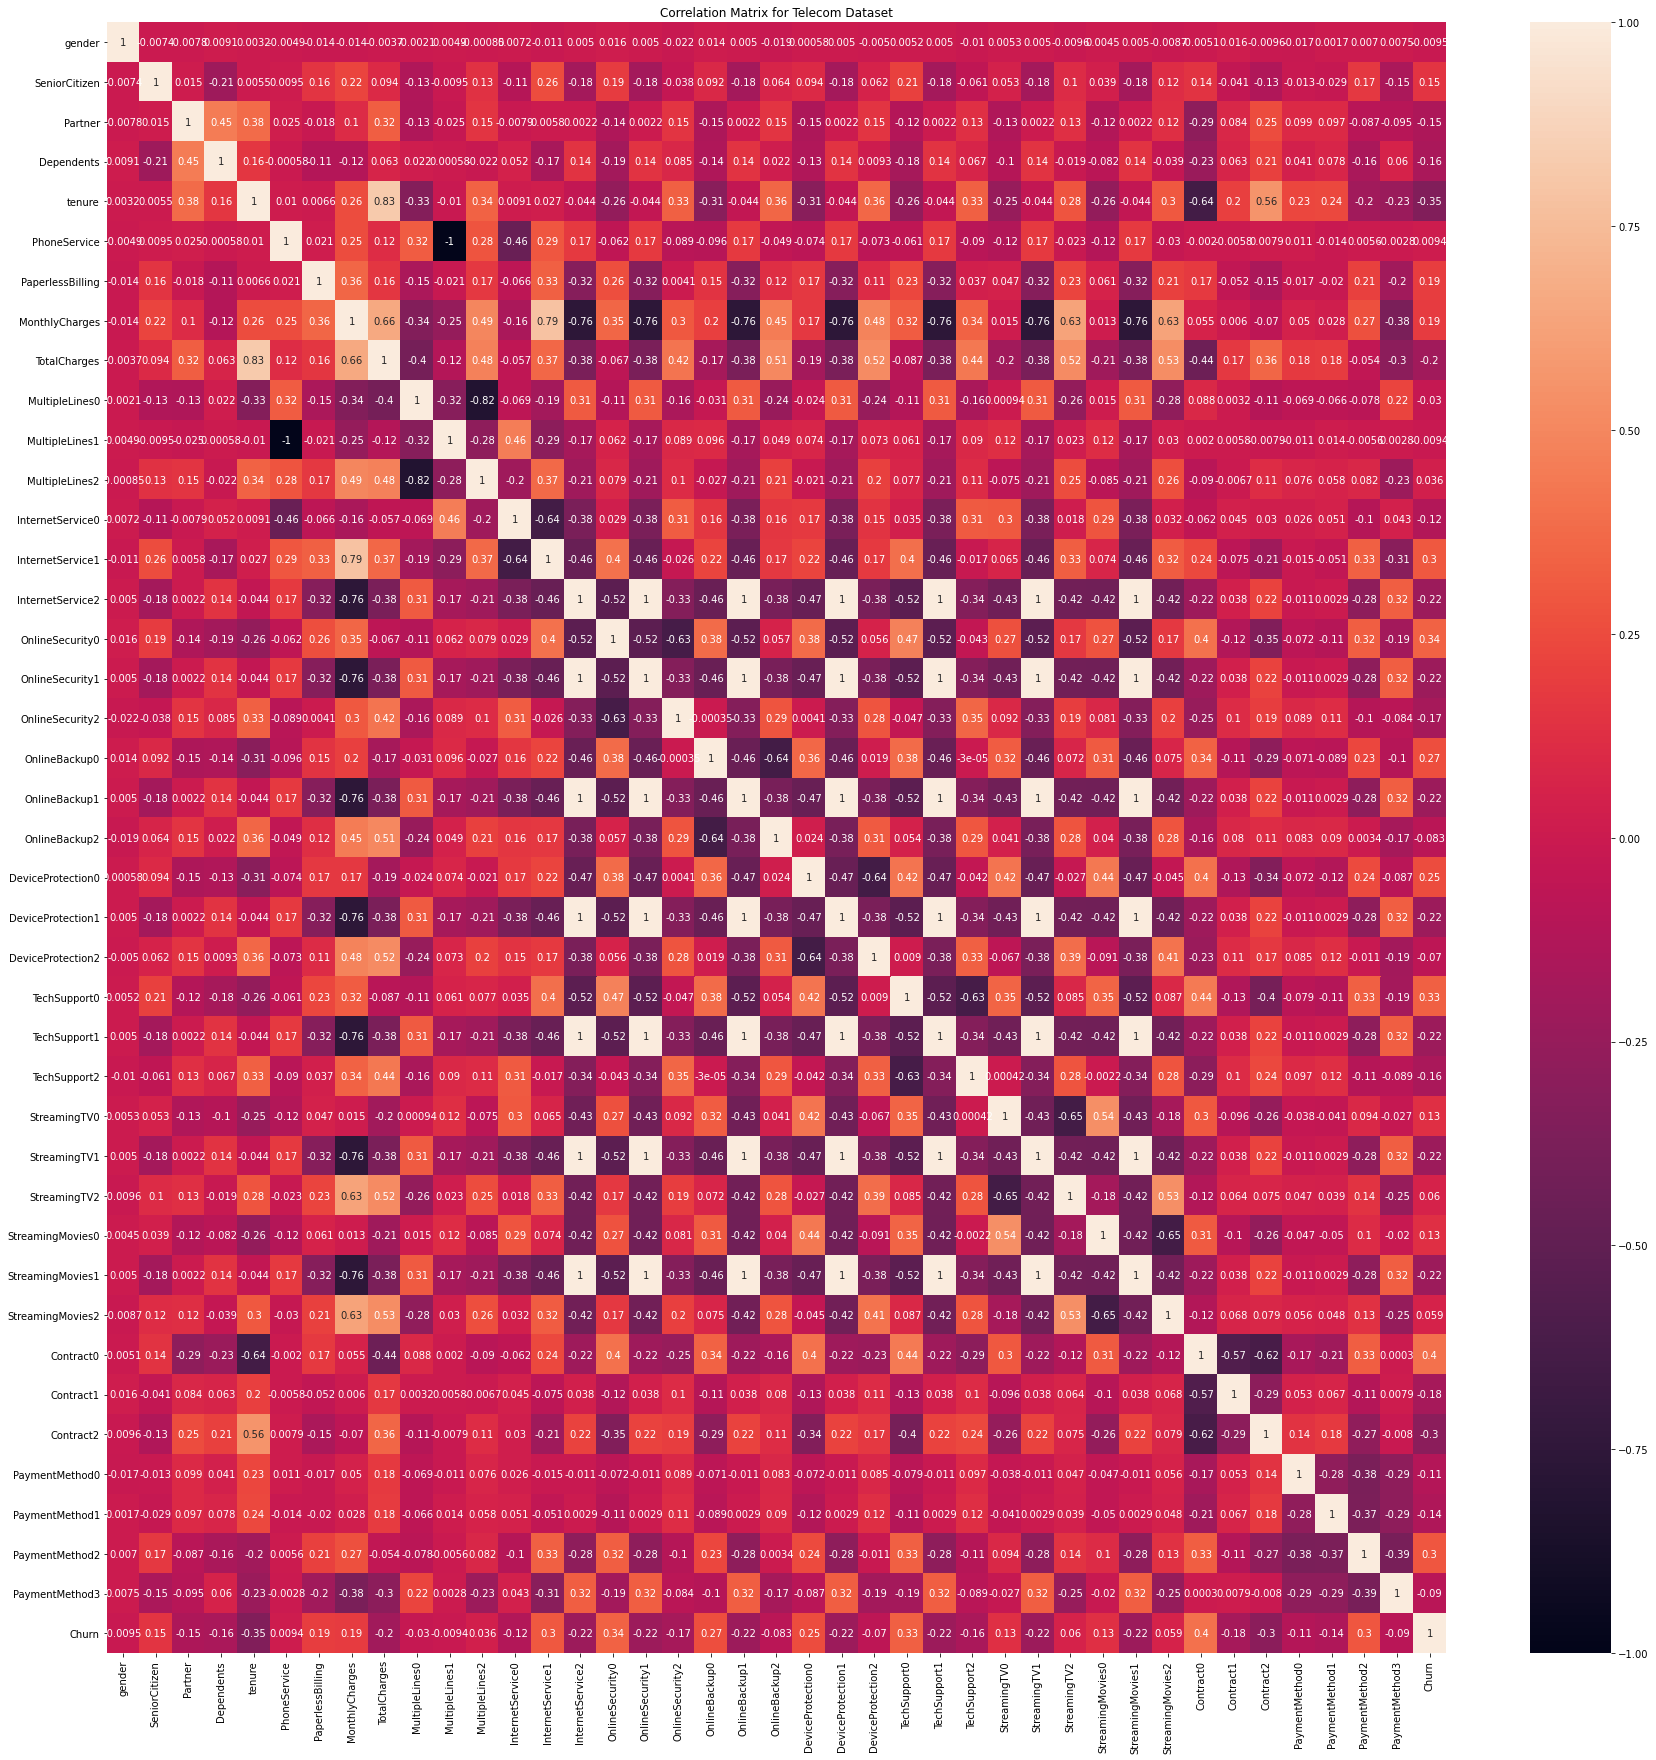

In [41]:
plt.figure(figsize=(30,30))
sns.heatmap(data=corr_mat, annot=True)
plt.title('Correlation Matrix for Telecom Dataset')
plt.show()

In [42]:
target = 'Churn'
skip = [target]
accept = []

for entry in corr_mat.index:
    if entry not in skip and entry not in accept:
        # get a series from dataframe using 'entry' as index
        similar_to_entry_s = corr_mat.loc[entry]

        # look for other features that are highly-correlated with 'entry'
        similar_to_entry_s = similar_to_entry_s[(similar_to_entry_s >= 0.6)]

        # fetch 'Churn' column that only contains items found in 'similar_to_entry_s'
        similar_to_target_s = corr_mat.loc[similar_to_entry_s.index][target]

        # idxmax() to get the feature name that is most correlated with 'Churn'
        top_feature = similar_to_target_s.abs().idxmax()

        # accept the feature with max correlation against 'Churn'
        accept.append(top_feature)

        # discard other features in 'similar_to_entry_s'
        skip += set(similar_to_entry_s.index) - {top_feature}

print('Skipped Features = ', set(skip) - {target})
print('Selected Features =', accept)

Skipped Features =  {'TechSupport1', 'OnlineSecurity1', 'StreamingTV2', 'StreamingMovies2', 'StreamingTV1', 'TotalCharges', 'OnlineBackup1', 'MonthlyCharges', 'StreamingMovies1', 'DeviceProtection1'}
Selected Features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'InternetService1', 'MultipleLines0', 'MultipleLines1', 'MultipleLines2', 'InternetService0', 'InternetService2', 'OnlineSecurity0', 'OnlineSecurity2', 'OnlineBackup0', 'OnlineBackup2', 'DeviceProtection0', 'DeviceProtection2', 'TechSupport0', 'TechSupport2', 'StreamingTV0', 'StreamingMovies0', 'Contract0', 'Contract1', 'Contract2', 'PaymentMethod0', 'PaymentMethod1', 'PaymentMethod2', 'PaymentMethod3']


In [43]:
# there are 10 features that are rejected
len(set(skip) - {target})

10

In [44]:
# there are 30 features that are accepted
len(accept)

30

In [45]:
# reset the dataframe to contain the 30 selected features and 1 dependent variable
accept.append(target)
df = df[accept]
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,InternetService1,MultipleLines0,MultipleLines1,MultipleLines2,InternetService0,InternetService2,OnlineSecurity0,OnlineSecurity2,OnlineBackup0,OnlineBackup2,DeviceProtection0,DeviceProtection2,TechSupport0,TechSupport2,StreamingTV0,StreamingMovies0,Contract0,Contract1,Contract2,PaymentMethod0,PaymentMethod1,PaymentMethod2,PaymentMethod3,Churn
0,1,0,1,1,72,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,0,0,0,0,44,1,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0,1,1,0,38,1,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,1,0,0,0,4,1,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,1,0,0,0,2,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
5982,0,0,1,1,23,1,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
5983,1,0,1,1,12,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
5984,1,1,0,0,12,1,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


# **9) Feature Extraction using PCA**

---



In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [47]:
# defining dependent variables
x = df.iloc[:, :-1]

# defining independent variable
y = df.iloc[:, -1].values

In [48]:
# perform standardisation
x_std = StandardScaler().fit_transform(x)

In [49]:
# apply PCA to reduce feature dimensions
pca = PCA(n_components=2)
pc = pca.fit_transform(x)
print(pc)
print(pc.shape)
print('Explained Variance ratio: ', pca.explained_variance_ratio_)
print('Explained Variance for ' + str(pca.n_components) + ' principal components: ', pca.explained_variance_ratio_.sum())

# PCA has enabled us to capture 99.3% of the original information in our dataset using just 2 principal components 

[[ 39.55134657   1.14382355]
 [ 11.51560835  -0.64413482]
 [  5.50798339  -1.62764522]
 ...
 [-20.46686041   1.28740014]
 [-20.47274457  -1.04229043]
 [ -6.45963059   1.74751826]]
(5986, 2)
Explained Variance ratio:  [0.99085073 0.00166635]
Explained Variance for 2 principal components:  0.9925170806597854


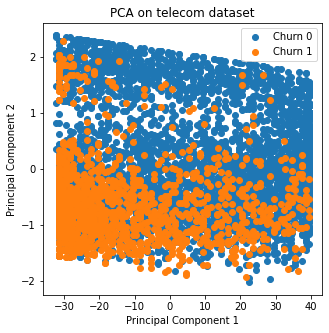

In [50]:
# plot PCA on telecom dataset with 2 values of 'Churn', namely 'no' and 'yes', or 0 and 1.
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

for i in np.unique(y):
    pc_by_churn = pc[y==i]
    ax.scatter(x=pc_by_churn[:, 0],
              y=pc_by_churn[:, 1],
              label='Churn ' + str(i))

plt.title('PCA on telecom dataset')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
plt.legend()
plt.show()

In [51]:
# use the 2 new independent variables
new_x = pd.DataFrame(pc, columns=['Principal Component 1', 'Principal Component 2'])
print(new_x.head())
# use y as the dependent variable
y = pd.DataFrame(y, columns=['Churn'])
print(y.head())

   Principal Component 1  Principal Component 2
0              39.551347               1.143824
1              11.515608              -0.644135
2               5.507983              -1.627645
3             -28.501612              -0.539569
4             -30.481176              -0.013481
   Churn
0      0
1      0
2      1
3      0
4      0


# **10) Machine Learning Models After One-Hot Encoding and Feature Extraction**
* Logistic Regression Model
* K-NN Classification
* Decision Trees
---



In [52]:
# from sklearn.model_selection import train_test_split

# use the 2 new independent variables
# new_x = pd.DataFrame(pc, columns=['Principal Component 1', 'Principal Component 2'])
# print(new_x.head())
# use y as the dependent variable
# y = pd.DataFrame(y, columns=['Churn'])
# print(y.head())

new_x_train, new_x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.2, random_state = 0)

**Logistic Regression Model**

In [53]:
# from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

time_1 = datetime.now()

lr.fit(new_x_train,y_train.values.ravel())

time_2 = datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken for training')

0.026945 seconds taken for training


In [54]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

time_1 = datetime.now()

y_pred = lr.predict(new_x_test)

time_2 = datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken for prediction')

cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

lra = accuracy_score(y_test,y_pred)
print('accuracy score = ',lra)

0.001316 seconds taken for prediction
confusion matrix:
 [[792  91]
 [153 162]]
accuracy score =  0.7963272120200334


**K-NN Classification**

In [55]:
# from sklearn.neighbors import KNeighborsClassifier
y_train = y_train.values.ravel()

k_array = np.arange(1,30,2)
for k in k_array:
    knn_ex = KNeighborsClassifier(n_neighbors=k)

    time_1 = datetime.now()

    knn_ex.fit(x_train, y_train)

    time_2 = datetime.now()
    time_delta = (time_2 - time_1)
    total_seconds = time_delta.total_seconds()
    print(f'{total_seconds} seconds taken')

    time_1 = datetime.now()

    y_pred=knn_ex.predict(x_test)

    time_2 = datetime.now()
    time_delta = (time_2 - time_1)
    total_seconds = time_delta.total_seconds()
    print(f'{total_seconds} seconds taken')

    print(k)
    print(accuracy_score(y_test, y_pred))


0.029004 seconds taken
0.095408 seconds taken
1
0.7045075125208681
0.019831 seconds taken
0.046632 seconds taken
3
0.7404006677796328
0.019011 seconds taken
0.048267 seconds taken
5
0.7429048414023373
0.019171 seconds taken
0.048751 seconds taken
7
0.7621035058430717
0.019317 seconds taken
0.049777 seconds taken
9
0.7721202003338898
0.018926 seconds taken
0.047841 seconds taken
11
0.7754590984974958
0.019016 seconds taken
0.051669 seconds taken
13
0.7838063439065108
0.019125 seconds taken
0.049929 seconds taken
15
0.7813021702838063
0.01936 seconds taken
0.052357 seconds taken
17
0.7838063439065108
0.019686 seconds taken
0.050253 seconds taken
19
0.7854757929883138
0.018853 seconds taken
0.05074 seconds taken
21
0.7863105175292153
0.019075 seconds taken
0.051466 seconds taken
23
0.7888146911519198
0.018978 seconds taken
0.052136 seconds taken
25
0.7888146911519198
0.018899 seconds taken
0.054864 seconds taken
27
0.7913188647746243
0.018955 seconds taken
0.053193 seconds taken
29
0.7913

In [56]:
# choose k=9
knn=KNeighborsClassifier(n_neighbors = 9)

time_1 = datetime.now()

knn.fit(x_train,y_train)

time_2 = datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken')

time_1 = datetime.now()

y_pred = knn.predict(x_test)

time_2 = datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken')

print(confusion_matrix(y_test,y_pred))
knna = accuracy_score(y_test,y_pred)
print(knna)

0.024475 seconds taken
0.046983 seconds taken
[[800  83]
 [190 125]]
0.7721202003338898


**Decision Tree**

In [57]:
# from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth =3, random_state=0)

time_1 = datetime.now()

dt.fit(new_x_train,y_train)

time_2 = datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken')

time_1 = datetime.now()

y_pred = dt.predict(new_x_test)

time_2 = datetime.now()
time_delta = (time_2 - time_1)
total_seconds = time_delta.total_seconds()
print(f'{total_seconds} seconds taken')

accuracy_score(y_test,y_pred)

0.009848 seconds taken
0.000816 seconds taken


0.7996661101836394

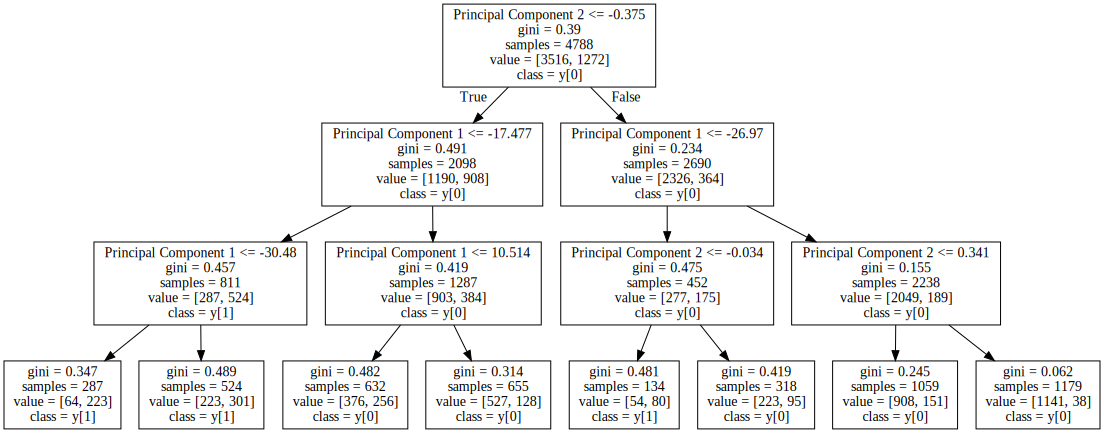

In [58]:
# from sklearn import tree
# import graphviz 
# from graphviz import Source

Source(tree.export_graphviz(dt,out_file=None, class_names=True, feature_names= new_x_train.columns))

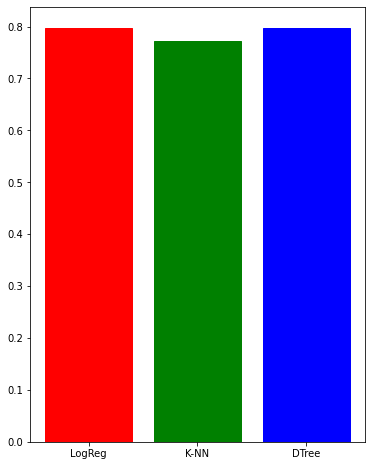

In [59]:
plt.figure(figsize=(6,8))
ac = [lra,knna,dta]
name = ['LogReg','K-NN','DTree']
barlist = plt.bar(name,ac)
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')

After one-hot encoding and feature selection, decision tree has the highest accuracy score.

# **11) Conclusion**

---
One-hot encoding was used to remove the ordinal ranking variables that might be captured when using the label encoder (e.g. 0 < 1, 1 < 2, 2 < 3). Independent variables with 3 or more unique values were converted into individual columns with ones and zeroes. 

After one-hot encoding, a heatmap was plotted. The low correlation observed in the heatmap for the target variable means there's no linear relationship; it does not mean there's no information in the feature that predicts the target. There are cases in which a single feature is useless but given more features it becomes important. 

Some of the features with high correlation to each other were removed to deal with multicollinearity. 

It is observed from the models run that multicollinearity does not appear to affect prediction accuracy. This is because the covariance between variables from the train data and test data is similar. However, when feeding in new data for prediction into the trained model, if the covariance between variables changes, accuracy will be affected. Furthermore, multicollinearity will affect the interpretability of the model. In practice, it will be difficult to predict how one feature affects the model with other features being constant as it has some correlation with other features. It can be noted that by nature decision trees are not affected by multicollinearity.

30 features were left after removing those with high correlation to each other. This leads to the curse of dimensionality. Feature extraction via PCA was performed to reduce the 30 features down to 2 principal components.

**Timings Before One-Hot Encoding and Feature Extraction**\
Logistic Regression: 
Training: 0.234s, Prediction: 0.00781s\
K-NN:
Training: 0.0125s, Prediction:0.0581s\
Decision Tree:
Training: 0.0126s, Prediction: 0.00119s

**Timings After One-Hot Encoding and Before Feature Extraction**\
Logistic Regression:
Training: 0.432s, Prediction: 0.00227s\
K-NN:
Training: 0.0214s ,Prediction: 0.0620s\
Decision Tree:
Training: 0.0121s ,Prediction: 0.00123s

**Timings After One-Hot Encoding and Feature Extraction**\
Logistic Regression:
Training: 0.0258s, Prediction: 0.00274s\
K-NN:
Training: 0.0233s, Prediction:0.0639s\
Decision Tree:
Training: 0.00781s, Prediction: 0.00201s

Training times were all under 1s due to a relatively small dataset (5986 rows and less than 50 features). Training times will likely increase dramatically when dataset reaches millions of rows with even more features. Prediction times were similarly under 0.1s due to small size of data used to predict.

Training times increased after one-hot encoding before feature extraction as the number of features increased by from 19 to 30. Afterwards, PCA was used to cut down the 30 features to 2 principal components. This resulted in a general trend of lower training times (0.432s to 0.0258s).

The overall accuracy of each model in each set hovers at around 80%. However, although not apparent in this situation, without accounting for multicollinearity, prediction accuracy of the model may be severely affected if covariance between variables changes. 
 